<a href="https://colab.research.google.com/github/iranjr85/igti_bootcamp_machine_learning/blob/master/desafio_MPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#colab utilizado para o desafio de MPT

In [0]:
#importando as bibliotecas
import pandas as pd  #biblioteca para utilizar os dataframes
import numpy as np   #biblioteca para trabalhar de forma otimizada com matrizes e vetores
import matplotlib.pylab as plt  #biblioteca para a construção de gráficos
import seaborn as sn #biblioteca para gráficos mais "bonitos"

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#importando os dados para o google colab
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [0]:
#criando o nosso dataframe a partir dos dados
df_vinhos=pd.read_csv("winequality-red.csv", sep=';')

In [0]:
#mostrando o dataset dos vinhos
df_vinhos.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Quantas instâncias e atributos possuem o dataset?**

In [0]:
instancias,atributos = df_vinhos.shape

In [0]:
print("O dataset possue {} instâncias e {} atributos".format(instancias,atributos))

O dataset possue 1599 instâncias e 12 atributos


**Existem valores nulos?**

In [0]:
df_vinhos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [0]:
#contando os valores
df_vinhos.isnull().sum() 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [0]:
print("Existem {} atributos do tipo {} e {} atributos do tipo {}.".format(df_vinhos.dtypes.value_counts()[0],df_vinhos.dtypes.value_counts().index[0],df_vinhos.dtypes.value_counts()[1], df_vinhos.dtypes.value_counts().index[1]))

Existem 11 atributos do tipo float64 e 1 atributos do tipo int64.


In [0]:
#aplicando as "estatísticas" para o dataset
df_vinhos.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [0]:
#encontrando a mediana
df_vinhos.median()

fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.07900
free sulfur dioxide     14.00000
total sulfur dioxide    38.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
quality                  6.00000
dtype: float64

**Aplicando a matriz de correlação**

In [0]:
#matriz de correlação não gráfica
df_vinhos.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


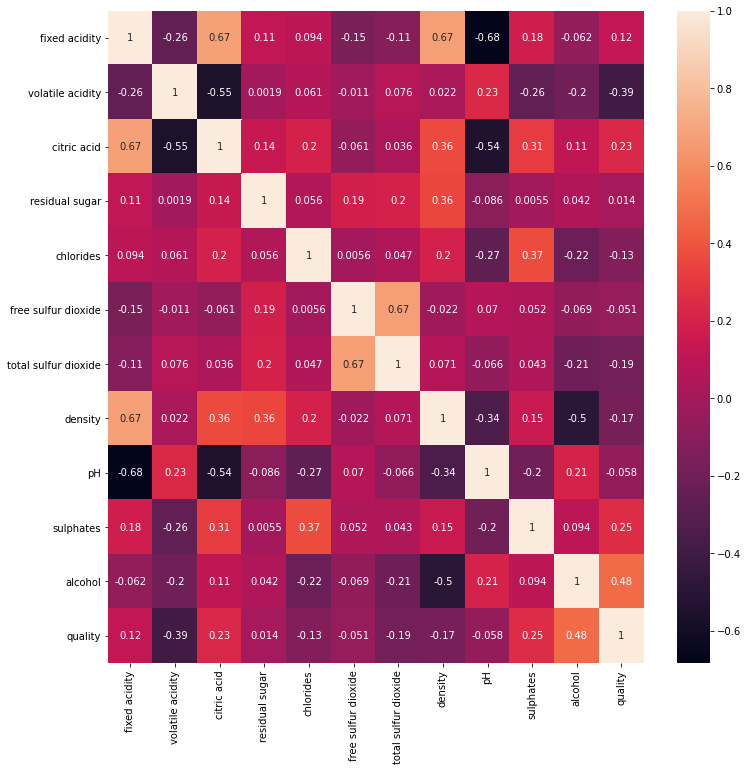

In [0]:
#matriz de correlação plotada
plt.figure(figsize=(12,12))
matriz_correlacao=df_vinhos.corr()
sn.heatmap(matriz_correlacao, annot=True)
plt.show()

In [0]:
#dividindo o dataset entre entrada e saída
entradas=df_vinhos.iloc[:,:-1] #seleciona todas as colunas menor a última
saida=df_vinhos.iloc[:,-1] #seleciona apenas a coluna de qualidade do vinho 

In [0]:
entradas.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [0]:
saida.head(5)

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

**Quantas instâncias existem para a qualidade do vinho igual a 5?**

In [0]:
#identificando as instâncias existentes para os dados
df_vinhos['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [0]:
df_vinhos['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [0]:
#importando o preprocessamento com o MinMax
from sklearn.preprocessing import MinMaxScaler

In [0]:
#aplicando para as entradas
scaler = MinMaxScaler()
entradas_scaler=scaler.fit(entradas)

In [0]:
#mostrando os dados máximos existentes em cada uma das variáveis (mesmos valores encontrados com a função describe)
entradas_scaler.data_max_

array([ 15.9    ,   1.58   ,   1.     ,  15.5    ,   0.611  ,  72.     ,
       289.     ,   1.00369,   4.01   ,   2.     ,  14.9    ])

In [0]:
#mostrando os dados após aplicar a normalização
entradas_normalizadas=scaler.transform(entradas)
print(entradas_normalizadas)

[[0.24778761 0.39726027 0.         ... 0.60629921 0.13772455 0.15384615]
 [0.28318584 0.52054795 0.         ... 0.36220472 0.20958084 0.21538462]
 [0.28318584 0.43835616 0.04       ... 0.40944882 0.19161677 0.21538462]
 ...
 [0.15044248 0.26712329 0.13       ... 0.53543307 0.25149701 0.4       ]
 [0.11504425 0.35958904 0.12       ... 0.65354331 0.22754491 0.27692308]
 [0.12389381 0.13013699 0.47       ... 0.51181102 0.19760479 0.4       ]]


In [0]:
#encontrando o menor valor para a coluna 0 = 'fixed acidity'
entradas_normalizadas[:,0].min()

0.0

In [0]:
#aplicando o divisão do dataset entre dados de treinamento e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(entradas_normalizadas, saida, test_size=0.30, random_state=1)

In [0]:
#contruindo o modelo para cliassificação com KNN com K=5
from sklearn.neighbors import KNeighborsClassifier
clf_KNN = KNeighborsClassifier(n_neighbors=5) #utiliza a construção por meio de 5 vizinhos

In [0]:
#treinando o modelo
clf_KNN.fit(X_train, y_train) # aplica a classificação

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
#realiza a previsão para o KNN
y_pred_KNN = clf_KNN.predict(X_test)

In [0]:
#acurácia do modelo via KNN
from sklearn.metrics import accuracy_score
print("Acurácia para a classificação utilizando o KNN:  ",accuracy_score(y_pred_KNN,y_test))

Acurácia para a classificação utilizando o KNN:   0.5645833333333333


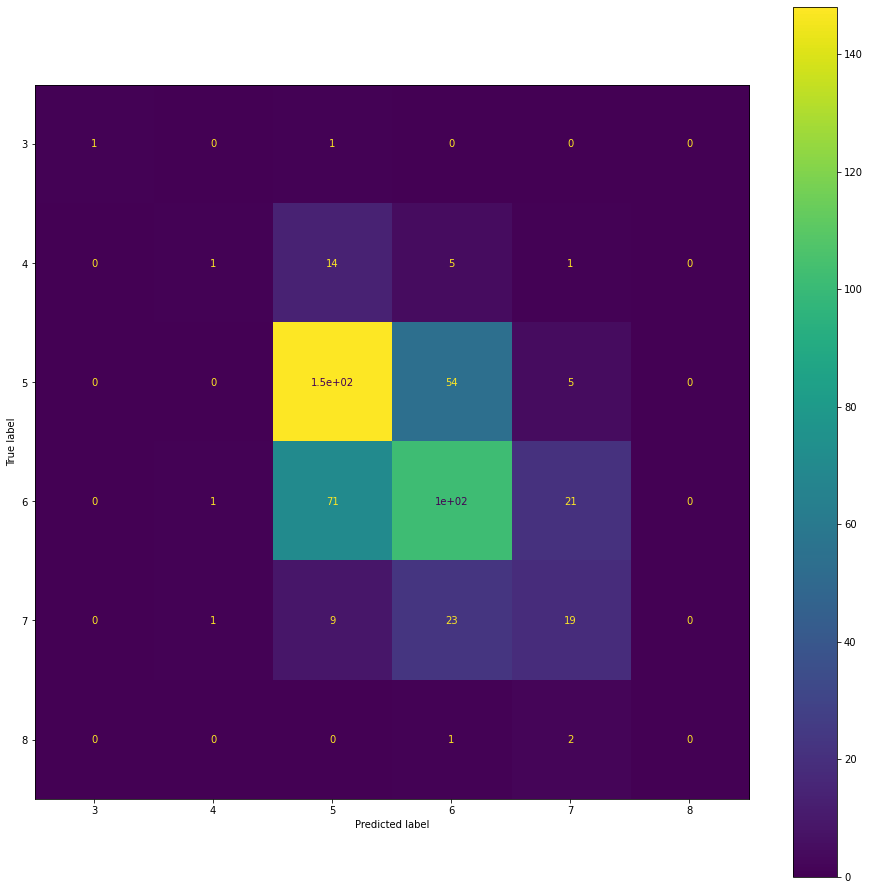

In [0]:
#realiza o plot da matriz de confusão
from sklearn.metrics import plot_confusion_matrix
plt.rcParams["figure.figsize"]=(16, 16)
plot_confusion_matrix(clf_KNN, X_test, y_test)
plt.show()

<Figure size 720x720 with 0 Axes>

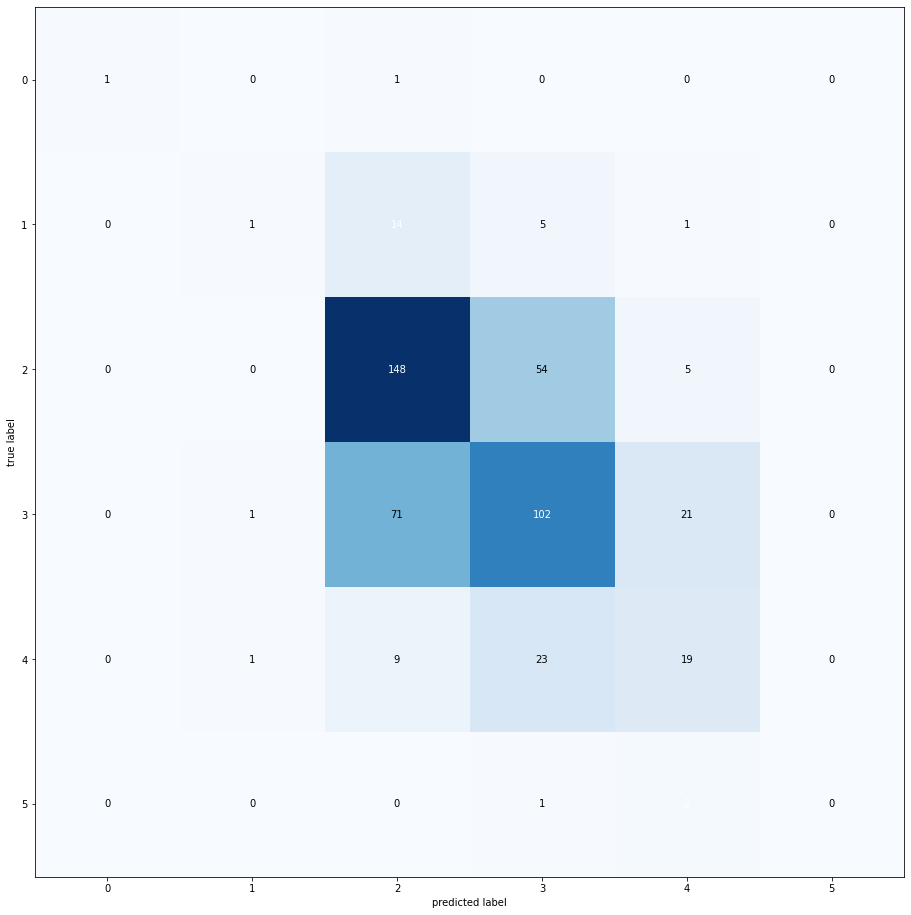

In [0]:
from mlxtend.plotting import plot_confusion_matrix
plt.figure(figsize=(10,10))
fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao_KNN)
plt.show()

In [0]:
#árvore de decisão
from sklearn.tree import DecisionTreeClassifier # importa o classificador árvore de decisão

In [0]:
# Cria o objeto de classificação através do 
clf_arvore = DecisionTreeClassifier()

# Realiza o treinamento do classificador
clf_arvore = clf_arvore.fit(X_train,y_train)

#Realiza a previsão de classificaçao 
y_pred_arvore = clf_arvore.predict(X_test)

In [0]:
#importando o f1-score
from sklearn.metrics import classification_report

In [0]:
print("O valor de f1-score para a árvore de decisão é:\n ",classification_report(y_test,y_pred_arvore))

O valor de f1-score para a árvore de decisão é:
                precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.13      0.10      0.11        21
           5       0.65      0.70      0.67       207
           6       0.64      0.52      0.57       195
           7       0.43      0.62      0.50        52
           8       0.25      0.33      0.29         3

    accuracy                           0.59       480
   macro avg       0.35      0.38      0.36       480
weighted avg       0.59      0.59      0.58       480



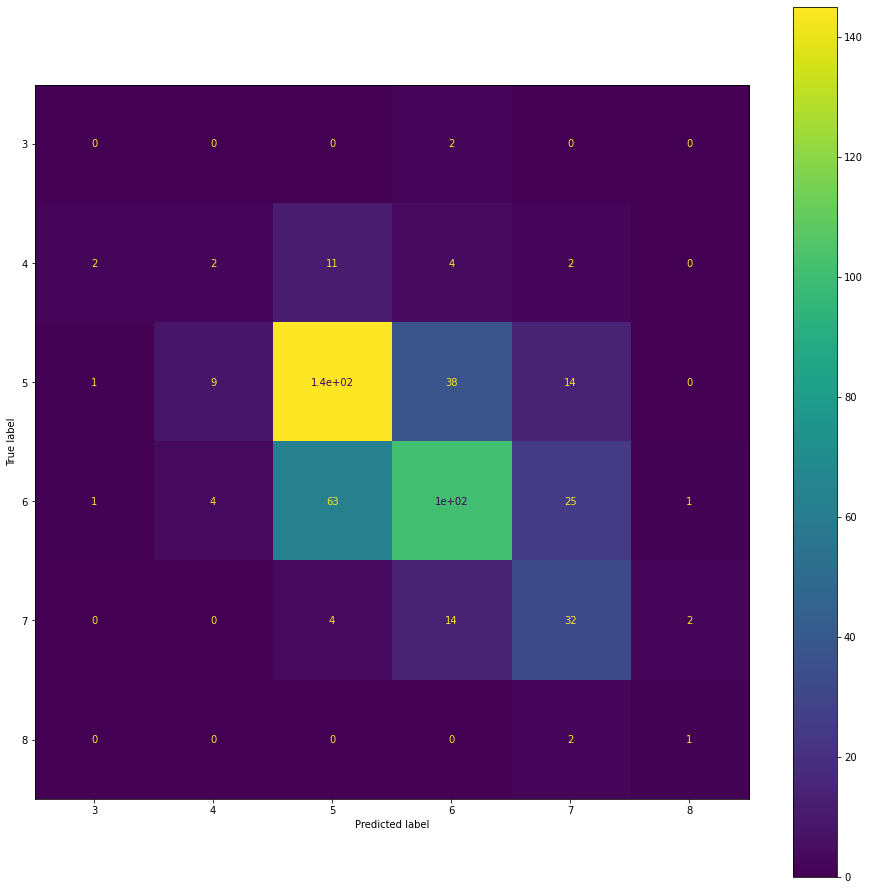

In [0]:
#realiza o plot da matriz de confusão
plt.rcParams["figure.figsize"]=(16, 16)
plot_confusion_matrix(clf_arvore, X_test, y_test)
plt.show()

In [0]:
#implementando a floresta randômica
from sklearn.ensemble import RandomForestClassifier

In [0]:
#define a floresta randomica
clf_floresta = RandomForestClassifier(max_depth=10, random_state=1)
clf_floresta.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [0]:
#Realiza a previsão de classificaçao 
y_pred_floresta = clf_floresta.predict(X_test)

In [0]:
print("O valor de f1-score para a floresta randômica é:\n ",classification_report(y_test,y_pred_floresta))

O valor de f1-score para a floresta randômica é:
                precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        21
           5       0.71      0.81      0.76       207
           6       0.66      0.70      0.68       195
           7       0.57      0.44      0.50        52
           8       0.00      0.00      0.00         3

    accuracy                           0.68       480
   macro avg       0.32      0.32      0.32       480
weighted avg       0.64      0.68      0.66       480



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


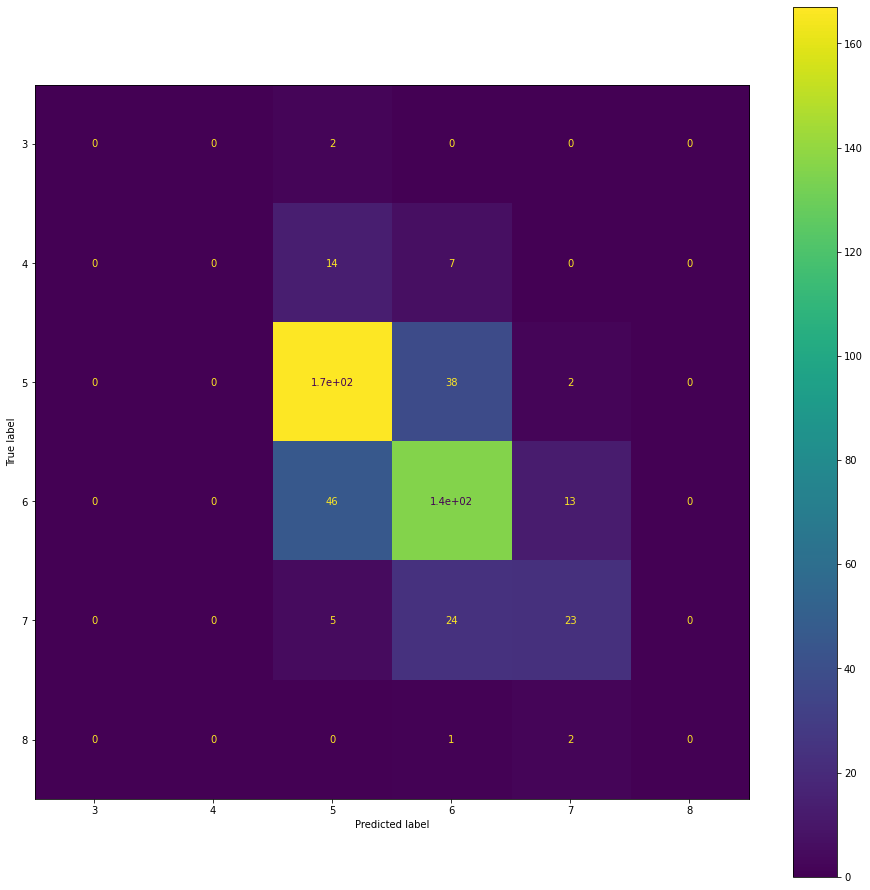

In [0]:
#realiza o plot da matriz de confusão
plt.rcParams["figure.figsize"]=(16, 16)
plot_confusion_matrix(clf_floresta, X_test, y_test)
plt.show()

In [0]:
#importando o svm como classificador
from sklearn.svm import SVC

In [0]:
#definindo o classificador svm
clf_svm=SVC(gamma='auto',kernel='rbf')


#realizando o treinamento do algoritmo
clf_svm.fit(X_train,y_train)


#realizando a previsão
y_pred_svm = clf_svm.predict(X_test)

In [0]:
print("O valor de f1-score para SVM é:\n ",classification_report(y_test,y_pred_svm))

O valor de f1-score para SVM é:
                precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        21
           5       0.63      0.78      0.70       207
           6       0.54      0.62      0.58       195
           7       0.00      0.00      0.00        52
           8       0.00      0.00      0.00         3

    accuracy                           0.59       480
   macro avg       0.20      0.23      0.21       480
weighted avg       0.49      0.59      0.54       480



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


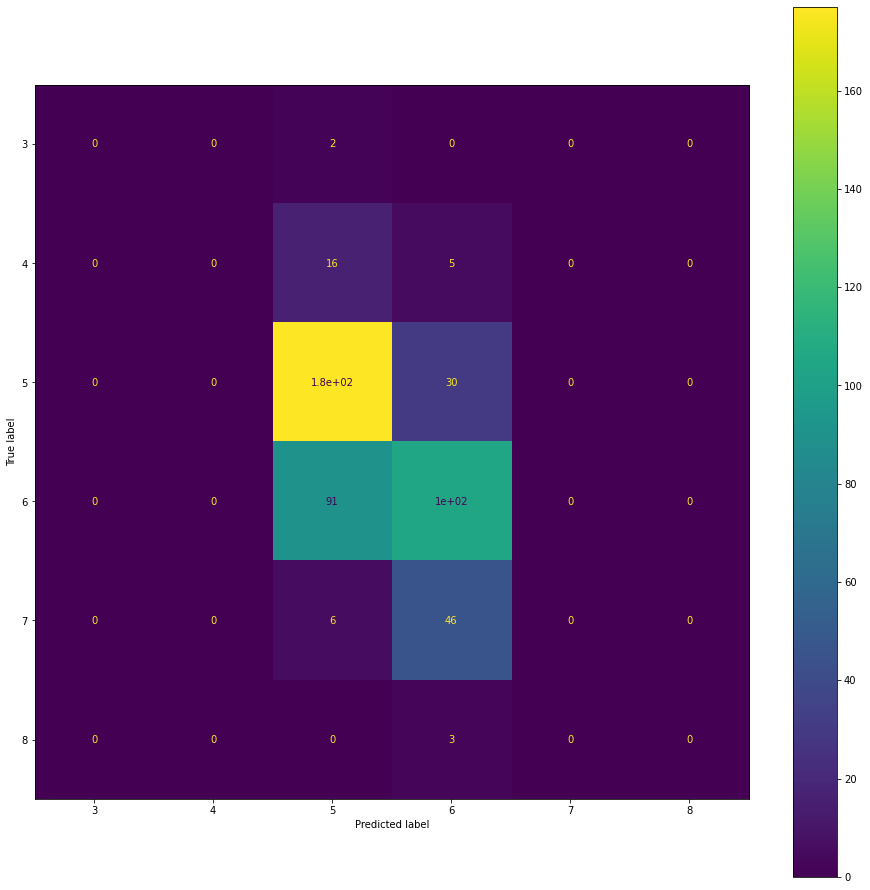

In [0]:
#realiza o plot da matriz de confusão
plt.rcParams["figure.figsize"]=(16, 16)
plot_confusion_matrix(clf_svm, X_test, y_test)
plt.show()

In [0]:
#MLP como classificador
from sklearn.neural_network import MLPClassifier

In [0]:
#define a configuração da rede
clf_mlp = MLPClassifier( alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1)

#realiza o fit do modelo
clf_mlp.fit(X_train,y_train)


#realiza a previsão
y_pred_mlp=clf_mlp.predict(X_test)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [0]:
print("O valor de f1-score para SVM é:\n ",classification_report(y_test,y_pred_mlp))

O valor de f1-score para SVM é:
                precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        21
           5       0.63      0.80      0.71       207
           6       0.57      0.57      0.57       195
           7       0.46      0.23      0.31        52
           8       0.00      0.00      0.00         3

    accuracy                           0.60       480
   macro avg       0.28      0.27      0.26       480
weighted avg       0.56      0.60      0.57       480



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
#modificando o dataset
new_df=df_vinhos.copy()
new_df['nova_qualidade']=new_df['quality'].apply(lambda x: 0 if x<=5 else 1)

In [0]:
new_df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,nova_qualidade
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,1


In [0]:
#drop da coluna quality
new_df.drop(labels=['quality'],axis=1,inplace=True)

In [0]:
new_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,nova_qualidade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [0]:
#colocando entradas e saidas
novas_entradas=new_df.iloc[:,:-1]
nova_saida=new_df.iloc[:,-1]

In [0]:
novas_entradas.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [0]:
nova_saida.values

array([0, 0, 0, ..., 1, 0, 1])

In [0]:
#aplicando o minmaxscaler
novas_entradas_scaler=scaler.fit(novas_entradas)

In [0]:
novas_entradas_minmax=scaler.transform(novas_entradas)
novas_entradas_minmax

array([[0.24778761, 0.39726027, 0.        , ..., 0.60629921, 0.13772455,
        0.15384615],
       [0.28318584, 0.52054795, 0.        , ..., 0.36220472, 0.20958084,
        0.21538462],
       [0.28318584, 0.43835616, 0.04      , ..., 0.40944882, 0.19161677,
        0.21538462],
       ...,
       [0.15044248, 0.26712329, 0.13      , ..., 0.53543307, 0.25149701,
        0.4       ],
       [0.11504425, 0.35958904, 0.12      , ..., 0.65354331, 0.22754491,
        0.27692308],
       [0.12389381, 0.13013699, 0.47      , ..., 0.51181102, 0.19760479,
        0.4       ]])

In [0]:
a=np.expand_dims(nova_saida, axis=1)
a.shape

(1599, 1)

In [0]:
#dividindo em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(novas_entradas_minmax, nova_saida, test_size=0.3, random_state=1)

In [0]:
#define a floresta randomica
clf_floresta_nova = RandomForestClassifier(max_depth=10, random_state=1)
clf_floresta_nova.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [0]:
#Realiza a previsão de classificaçao 
y_pred_floresta_nova = clf_floresta_nova.predict(X_test)

In [0]:
print("O valor de f1-score para a floresta randômica é:\n ",classification_report(y_test,y_pred_floresta_nova))

O valor de f1-score para a floresta randômica é:
                precision    recall  f1-score   support

           0       0.79      0.81      0.80       230
           1       0.82      0.80      0.81       250

    accuracy                           0.80       480
   macro avg       0.80      0.80      0.80       480
weighted avg       0.80      0.80      0.80       480



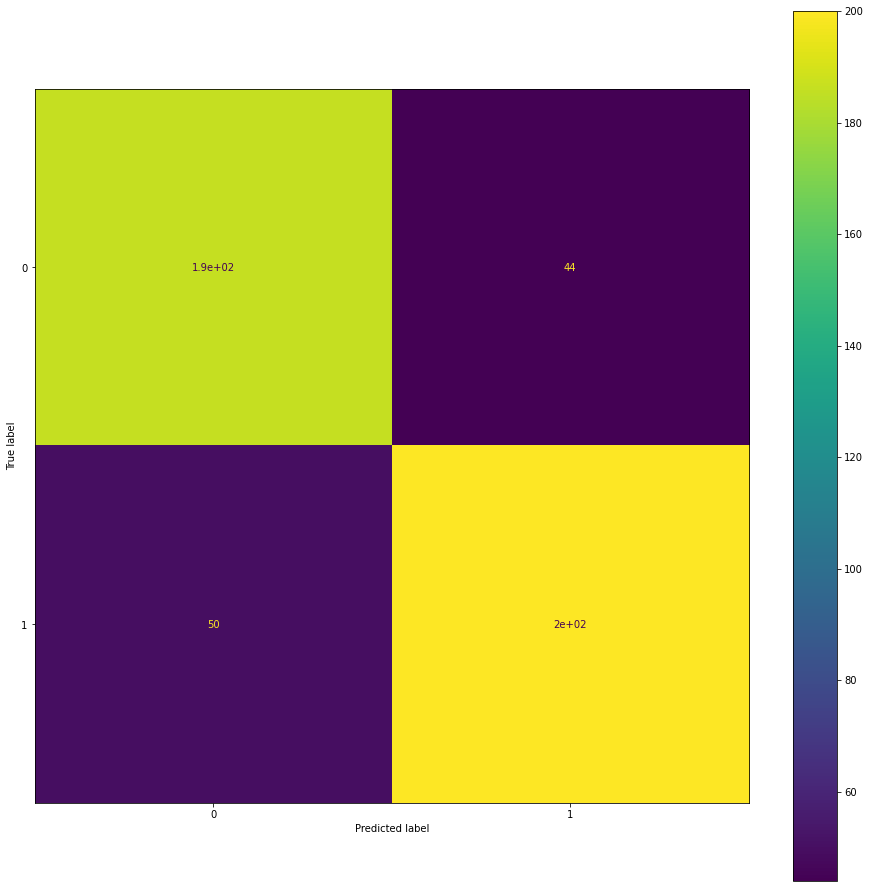

In [0]:
#realiza o plot da matriz de confusão
plt.rcParams["figure.figsize"]=(16, 16)
plot_confusion_matrix(clf_floresta_nova, X_test, y_test)
plt.show()